# **3. Evaluation & Selection & Recap**

### **Problem Statement**  

Compare the performance of Decision Tree and Random Forest Regression models in predicting students' **GPA (Grade Point Average)** based on study habits, parental involvement, extracurricular activities, and other demographic factors. Identify which model provides better accuracy and generalization for educational performance prediction.

---

### **Dataset Overview**  
**DataSetLink**: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

#### **Attributes**:  
1. **Student Information**:  
   - `StudentID`: Unique identifier for each student.  

2. **Demographic Details**:  
   - `Age`: Age of students (15–18 years).  
   - `Gender`: 0 = Male, 1 = Female.  
   - `Ethnicity`:  
     - 0: Caucasian  
     - 1: African American  
     - 2: Asian  
     - 3: Other  
   - `ParentalEducation`:  
     - 0: None  
     - 1: High School  
     - 2: Some College  
     - 3: Bachelor's  
     - 4: Higher  

3. **Study Habits**:  
   - `StudyTimeWeekly`: Weekly study time (hours, 0–20).  
   - `Absences`: Number of absences (0–30).  
   - `Tutoring`: 0 = No, 1 = Yes.  

4. **Parental Involvement**:  
   - `ParentalSupport`:  
     - 0: None  
     - 1: Low  
     - 2: Moderate  
     - 3: High  
     - 4: Very High  

5. **Extracurricular Activities**:  
   - `Extracurricular`: 0 = No, 1 = Yes.  
   - `Sports`: 0 = No, 1 = Yes.  
   - `Music`: 0 = No, 1 = Yes.  
   - `Volunteering`: 0 = No, 1 = Yes.  

6. **Academic Performance**:  
   - `GPA`: Grade Point Average (2.0–4.0).  

#### **Target Variable**:  
- **GradeClass**: Classification of grades based on GPA:  
  - 0: 'A' (GPA ≥ 3.5)  
  - 1: 'B' (3.0 ≤ GPA < 3.5)  
  - 2: 'C' (2.5 ≤ GPA < 3.0)  
  - 3: 'D' (2.0 ≤ GPA < 2.5)  
  - 4: 'F' (GPA < 2.0)  

---

### **Instructions**  

1. **Data Preparation**  
   - Load the dataset and explore the features.  
   - Drop irrelevant columns such as `StudentID`.  
   - Ensure there are no missing values; handle them if present.  
   - Normalize or scale continuous features (`StudyTimeWeekly`, `Absences`, etc.) if necessary.  

2. **Model Training**  
   - Train a **Decision Tree Regressor** and a **Random Forest Regressor** on the dataset using `GPA` as the target variable.  
   - Use 80% of the data for training and 20% for testing.  

3. **Evaluation**  
   - Evaluate both models using:  
     - **Mean Squared Error (MSE)**  
     - **R² Score**  
     - **Mean Absolute Error (MAE)**  
   - Compare the results for both models.  

4. **Visualization**  
   - Plot the **predicted vs. actual values** for both models.  
   - Visualize the feature importance for the Random Forest model.  

5. **Report Writing**  
   - Write a brief report summarizing:  
     - Model performance.  
     - Key features influencing the predictions.  
     - Which model performed better and why.  

---  



In [ ]:
import pandas as pd

data = pd.read_csv("Student_performance_data _.csv")




In [ ]:
print(data.head())



   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [ ]:
data = data.drop(columns=["StudentID"])

print("Missing values per column:\n", data.isnull().sum())

data = data.fillna(data.mean())


Missing values per column:
 Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:

print(data.describe())

               Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000        2392.000000   
mean     16.468645     0.510870     0.877508           1.746237   
std       1.123798     0.499986     1.028476           1.000411   
min      15.000000     0.000000     0.000000           0.000000   
25%      15.000000     0.000000     0.000000           1.000000   
50%      16.000000     1.000000     0.000000           2.000000   
75%      17.000000     1.000000     2.000000           2.000000   
max      18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000   

In [ ]:
from sklearn.preprocessing import MinMaxScaler

continuous_features = ["Age", "StudyTimeWeekly", "Absences", "ParentalSupport"]

scaler = MinMaxScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

print(data[continuous_features].head())


        Age  StudyTimeWeekly  Absences  ParentalSupport
0  0.666667         0.992773  0.241379             0.50
1  1.000000         0.771270  0.000000             0.25
2  0.000000         0.210718  0.896552             0.50
3  0.666667         0.501965  0.482759             0.75
4  0.666667         0.233840  0.586207             0.75


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["GPA", "GradeClass"])
y = data["GPA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Training set size: 1913, Testing set size: 479


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [ ]:
dt_predictions = dt_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Decision Tree Evaluation
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

print("Decision Tree Performance:")
print(f"Mean Squared Error: {dt_mse}")
print(f"R² Score: {dt_r2}")
print(f"Mean Absolute Error: {dt_mae}")




Decision Tree Performance:
Mean Squared Error: 0.10959029007457573
R² Score: 0.8674737358098544
Mean Absolute Error: 0.26287494438394354


In [ ]:
# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

print("\nRandom Forest Performance:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R² Score: {rf_r2}")
print(f"Mean Absolute Error: {rf_mae}")


Random Forest Performance:
Mean Squared Error: 0.0604709087105201
R² Score: 0.9268732328554374
Mean Absolute Error: 0.19079954393034665


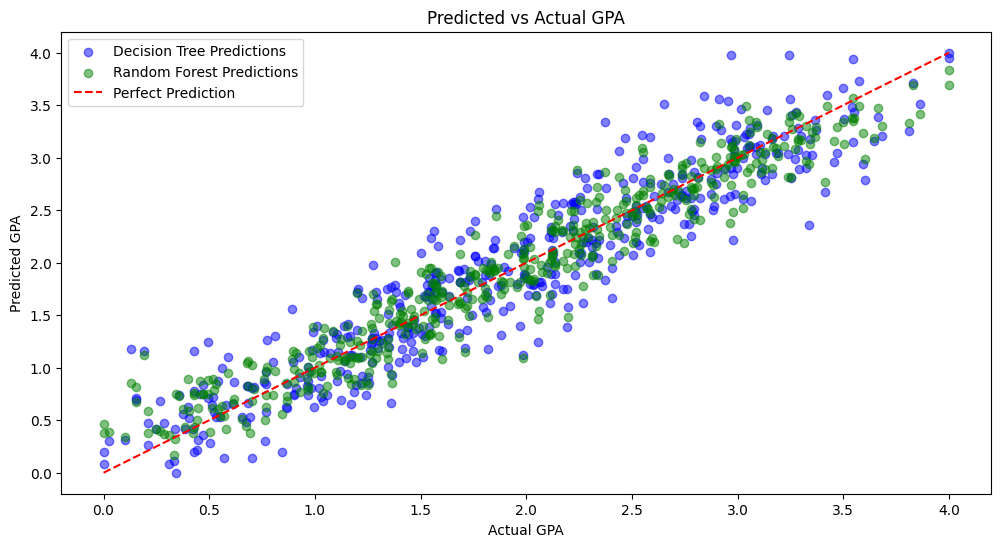

In [ ]:
import matplotlib.pyplot as plt

# Decision Tree: Predicted vs Actual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, dt_predictions, color="blue", alpha=0.5, label="Decision Tree Predictions")
plt.scatter(y_test, rf_predictions, color="green", alpha=0.5, label="Random Forest Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Predicted vs Actual GPA")
plt.legend()
plt.show()


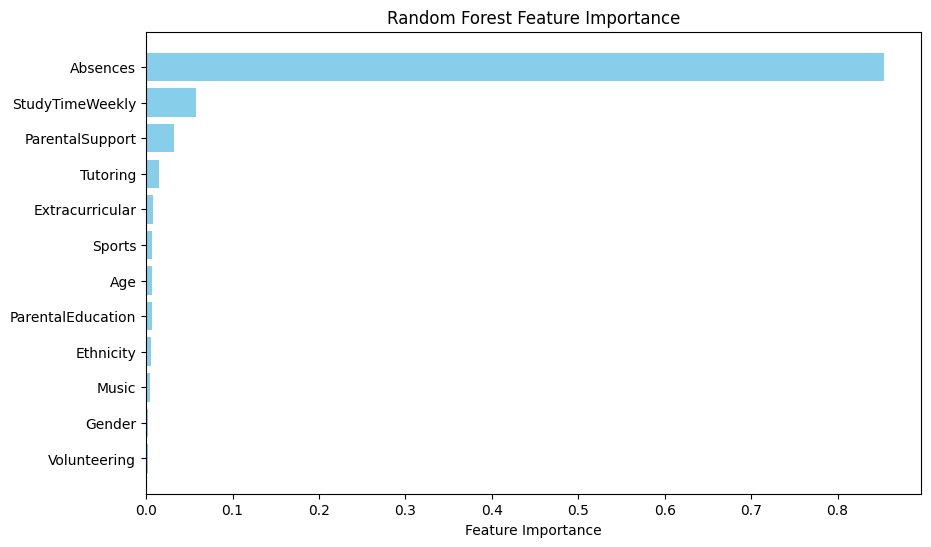

In [ ]:
# Extracting feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()
